>Image EDA 

Here I will try to work with the images a little 

- Note: these are only a template where I modified with just a few images, in order to take advantage of this notebook, please replace the path of your own images.

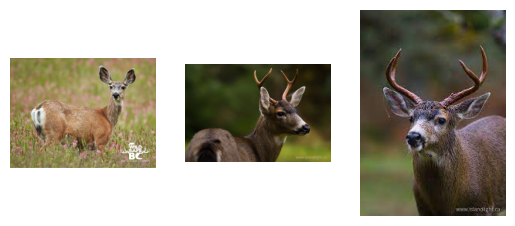

In [5]:
import os
from PIL import Image
import matplotlib.pyplot as plt

def load_images_from_folder(folder, num_images=5):
    images = []
    for filename in os.listdir(folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):  # Check for common image file extensions
            try:
                img = Image.open(os.path.join(folder, filename))
                images.append(img)
                if len(images) == num_images:  # Load only the specified number of images
                    break
            except IOError:
                print(f"Cannot open {filename}")
    return images

folder = 'C:/Users/henic/OneDrive/Desktop'  # Adjust the path as needed
images = load_images_from_folder(folder)

# Displaying the first few images
for i, img in enumerate(images):
    plt.subplot(1, len(images), i+1)
    plt.imshow(img)
    plt.axis('off')
plt.show()




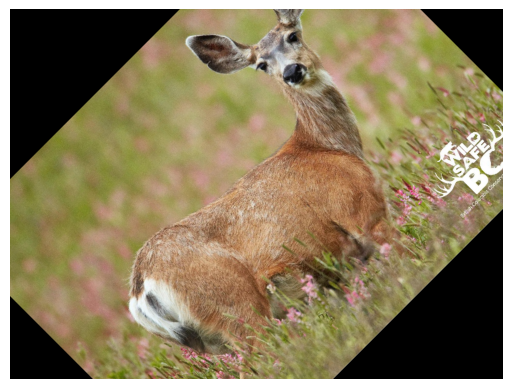

In [6]:
def rotate_image(image, angle):
    return image.rotate(angle)

# Example: Rotate first image by 45 degrees
rotated_image = rotate_image(images[0], 45)
plt.imshow(rotated_image)
plt.axis('off')
plt.show()


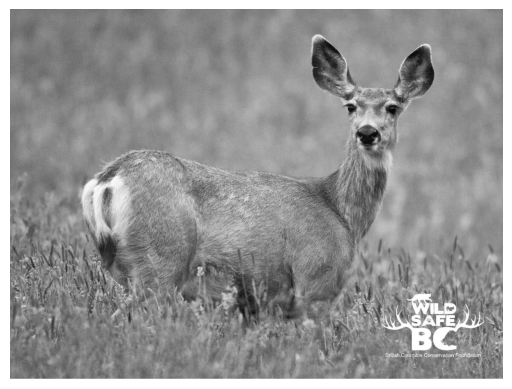

In [7]:
def convert_to_grayscale(image):
    return image.convert("L")

# Example: Convert first image to grayscale
gray_image = convert_to_grayscale(images[0])
plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.show()


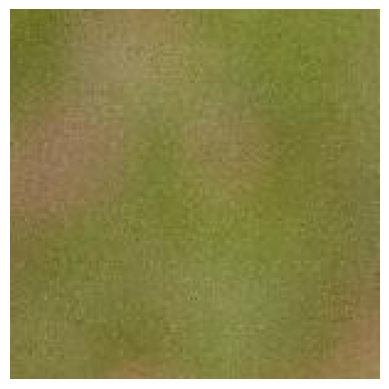

In [8]:
def crop_image(image, crop_area):
    return image.crop(crop_area)

# Example: Crop the first image
# crop_area = (left, top, right, bottom)
crop_area = (50, 50, 200, 200)
cropped_image = crop_image(images[0], crop_area)
plt.imshow(cropped_image)
plt.axis('off')
plt.show()


In [9]:
def save_image(image, filename):
    image.save(filename)

# save_image(rotated_image, '/path/to/save/rotated_image.jpg')
# save_image(gray_image, '/path/to/save/gray_image.jpg')
# save_image(cropped_image, '/path/to/save/cropped_image.jpg')


>Object Detection for Cropping

For object detection (to crop just the deer part), you'll need a pre-trained model. Libraries like TensorFlow or PyTorch offer such models. This is a more complex task and goes beyond a simple script.

In [ ]:
# pip install torch torchvision

In [11]:
# Import required libraries
import torch
import torchvision.transforms as T
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from PIL import Image, ImageDraw


In [ ]:
# Load a Pre-Trained Model
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()  # Set the model to evaluation mode


In [13]:
# Define the Image Transformation
transform = T.Compose([
    T.ToTensor(),
])


In [15]:
# Load and Transform the images
image = Image.open("C:/Users/henic/OneDrive/Desktop/1.jpg")  # Replace with your image path
image_tensor = transform(image)


In [16]:
# Perform object detection
with torch.no_grad():
    prediction = model([image_tensor])


In [17]:
# Filter out detection of the deer
threshold = 0.9  # Confidence threshold
deer_boxes = [box for box, label, score in zip(prediction[0]['boxes'], prediction[0]['labels'], prediction[0]['scores']) if label == 20 and score > threshold]


In [18]:
# Crop the deer part from the image
for box in deer_boxes:
    box = [round(i) for i in box.tolist()]
    cropped_image = image.crop(box)  # Crop the deer part
    cropped_image.show()  # Display the cropped part


In [19]:
# Check if any deer was detected
if deer_boxes:
    for i, box in enumerate(deer_boxes):
        box = [round(b) for b in box.tolist()]
        cropped_image = image.crop(box)  # Crop the deer part
        cropped_image_path = f"cropped_deer_{i}.jpg"
        cropped_image.save(cropped_image_path)  # Save the cropped image
        print(f"Cropped deer image saved as {cropped_image_path}")
else:
    print("No deer detected in the image.")


No deer detected in the image.


-This model is unable to detect deers, since it's not yet trained 
properly, or the default model isn't good enough for it to detect deers. However, for more common objects, like people, you should be able to do it. 

-Here is a summary of the steps:

In [ ]:
import torch
import torchvision.transforms as T
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from PIL import Image

# Load the pre-trained model
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Image transformation
transform = T.Compose([T.ToTensor()])

# Load and transform the image
image = Image.open("path_to_your_image.jpg")  # Replace with your image path
image_tensor = transform(image)

# Object detection
with torch.no_grad():
    prediction = model([image_tensor])

# Filter out deer detections
threshold = 0.9
deer_boxes = [box for box, label, score in zip(prediction[0]['boxes'], prediction[0]['labels'], prediction[0]['scores']) if label == 20 and score > threshold]

# Crop and save deer images
if deer_boxes:
    for i, box in enumerate(deer_boxes):
        box = [round(b) for b in box.tolist()]
        cropped_image = image.crop(box)
        cropped_image_path = f"cropped_deer_{i}.jpg"
        cropped_image.save(cropped_image_path)
        print(f"Cropped deer image saved as {cropped_image_path}")
else:
    print("No (object name) detected in the image.")
